## Exploring The Calving Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
import random as random

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
dtype_dict = {
    'SE_Number': 'str',
    'FarmName_Pseudo': 'str',
    'CalvingDate': 'str',
    'CalvingSireBullID': 'str',
    'CalvingEase': 'str',
    'BreedName': 'str',
    'BirthDate': 'str',
    'Mother': 'str',
    'Father': 'str',
    'YearSeason': 'str',
    'MeanTemperature': 'float',
    'MeanRelativeHumidity': 'float',
    'MeanTHI_adj': 'float',
    'HW': 'Int64',
    'cum_HW': 'Int64',
    'MaxTemp15Threshold': 'Int64'
}

# Load the data using the dtype_dict
data = pd.read_csv('../Data/MergedData/TheCalvingData.csv', dtype=dtype_dict)

# Convert the date columns to datetime
date_columns = [
    'CalvingDate',
    'BirthDate'
]

for column in date_columns:
    data[column] = pd.to_datetime(data[column], errors='coerce')

data.head()

,SE_Number,FarmName_Pseudo,CalvingDate,CalvingSireBullID,CalvingEase,YearSeason,BreedName,BirthDate,Mother,Father,MeanTemperature,MeanRelativeHumidity,MeanTHI_adj,HW,cum_HW,MaxTemp15Threshold
0,SE-064c0cec-1189,a624fb9a,2022-05-25,9-4733 Fillman,12,2022-2,02 SLB,2013-07-12,NaN,NaN,12.987500,0.755542,55.218420,0,0,1
1,SE-064c0cec-1189,a624fb9a,2022-05-25,9-4733 Fillman,11,2022-2,02 SLB,2013-07-12,NaN,NaN,12.987500,0.755542,55.218420,0,0,1
2,SE-30dc5787-1389,a624fb9a,2022-04-11,22-8352 Ventura,11,2022-2,01 SRB,2015-01-27,NaN,NaN,4.208333,0.485667,45.716935,0,0,0
3,SE-30dc5787-1389,a624fb9a,2023-05-15,22-8352 Ventura,11,2023-2,01 SRB,2015-01-27,NaN,NaN,15.045833,0.524333,60.559813,0,0,1
4,SE-30dc5787-1396,a624fb9a,2022-08-31,3-7725 Attack,11,2022-3,02 SLB,2015-03-20,NaN,NaN,11.041667,0.794792,53.536477,0,0,0


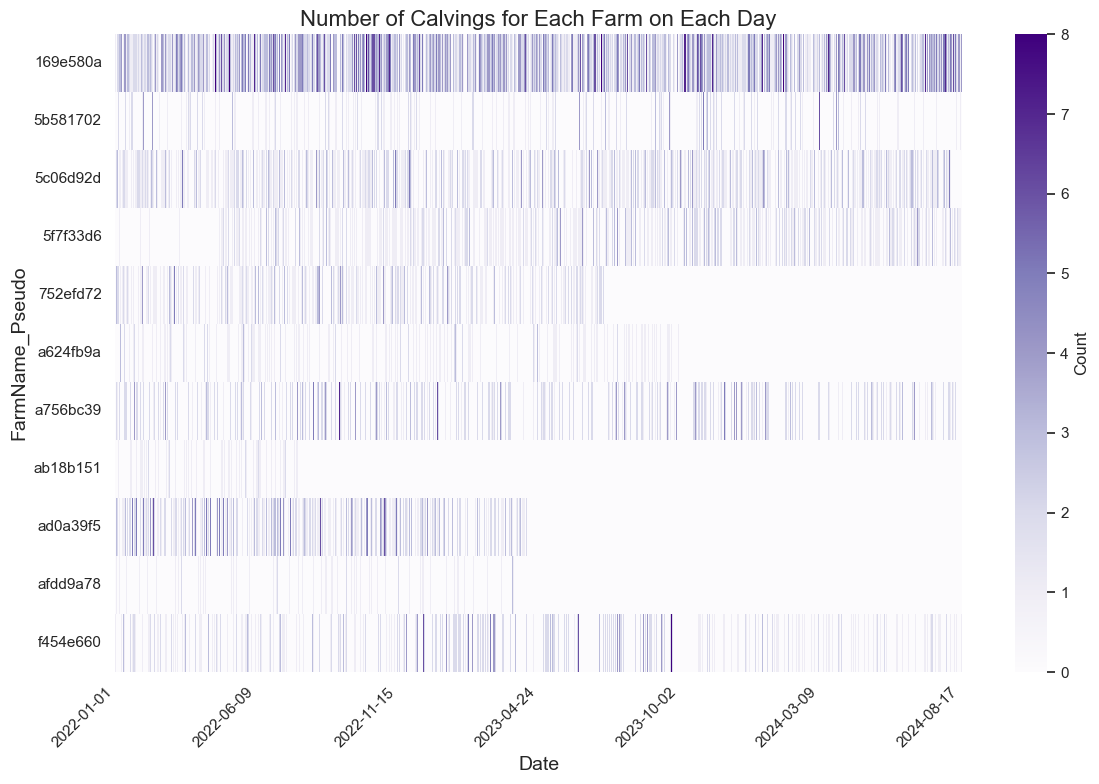

In [3]:
# Group the data by 'FarmName_Pseudo' and 'CalvingDate', and get the count
count_data = data.groupby(['FarmName_Pseudo', 'CalvingDate']).size().reset_index(name='Count')

# Convert 'CalvingDate' to datetime
count_data['CalvingDate'] = pd.to_datetime(count_data['CalvingDate'])

# Sort the data by date to ensure the labels match the ticks
count_data.sort_values('CalvingDate', inplace=True)

# Pivot to have 'CalvingDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='CalvingDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Purples', cbar_kws={'label': 'Count'})

num_days = len(pivot_data.columns)
days_between_ticks = max(num_days // 6, 1)  # Adjust this as needed 

ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Calvings for Each Farm on Each Day', fontsize=16)

plt.tight_layout()
plt.show()

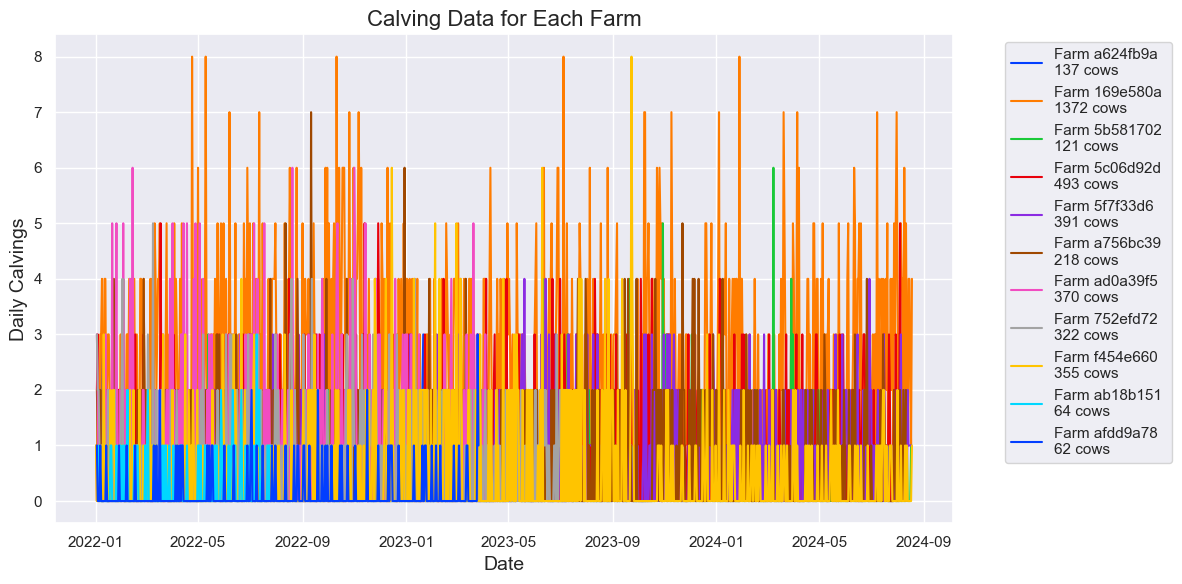

In [4]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_calvings = selected_farm.groupby('CalvingDate').size()
    
    # Check if daily_calvings has valid dates
    if not daily_calvings.empty and pd.notna(daily_calvings.index.min()) and pd.notna(daily_calvings.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_calvings.index.min(), end=daily_calvings.index.max(), freq='D')
        daily_calvings = daily_calvings.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_calvings.index, daily_calvings.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    
ax.set_title('Calving Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Calvings', fontsize=14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

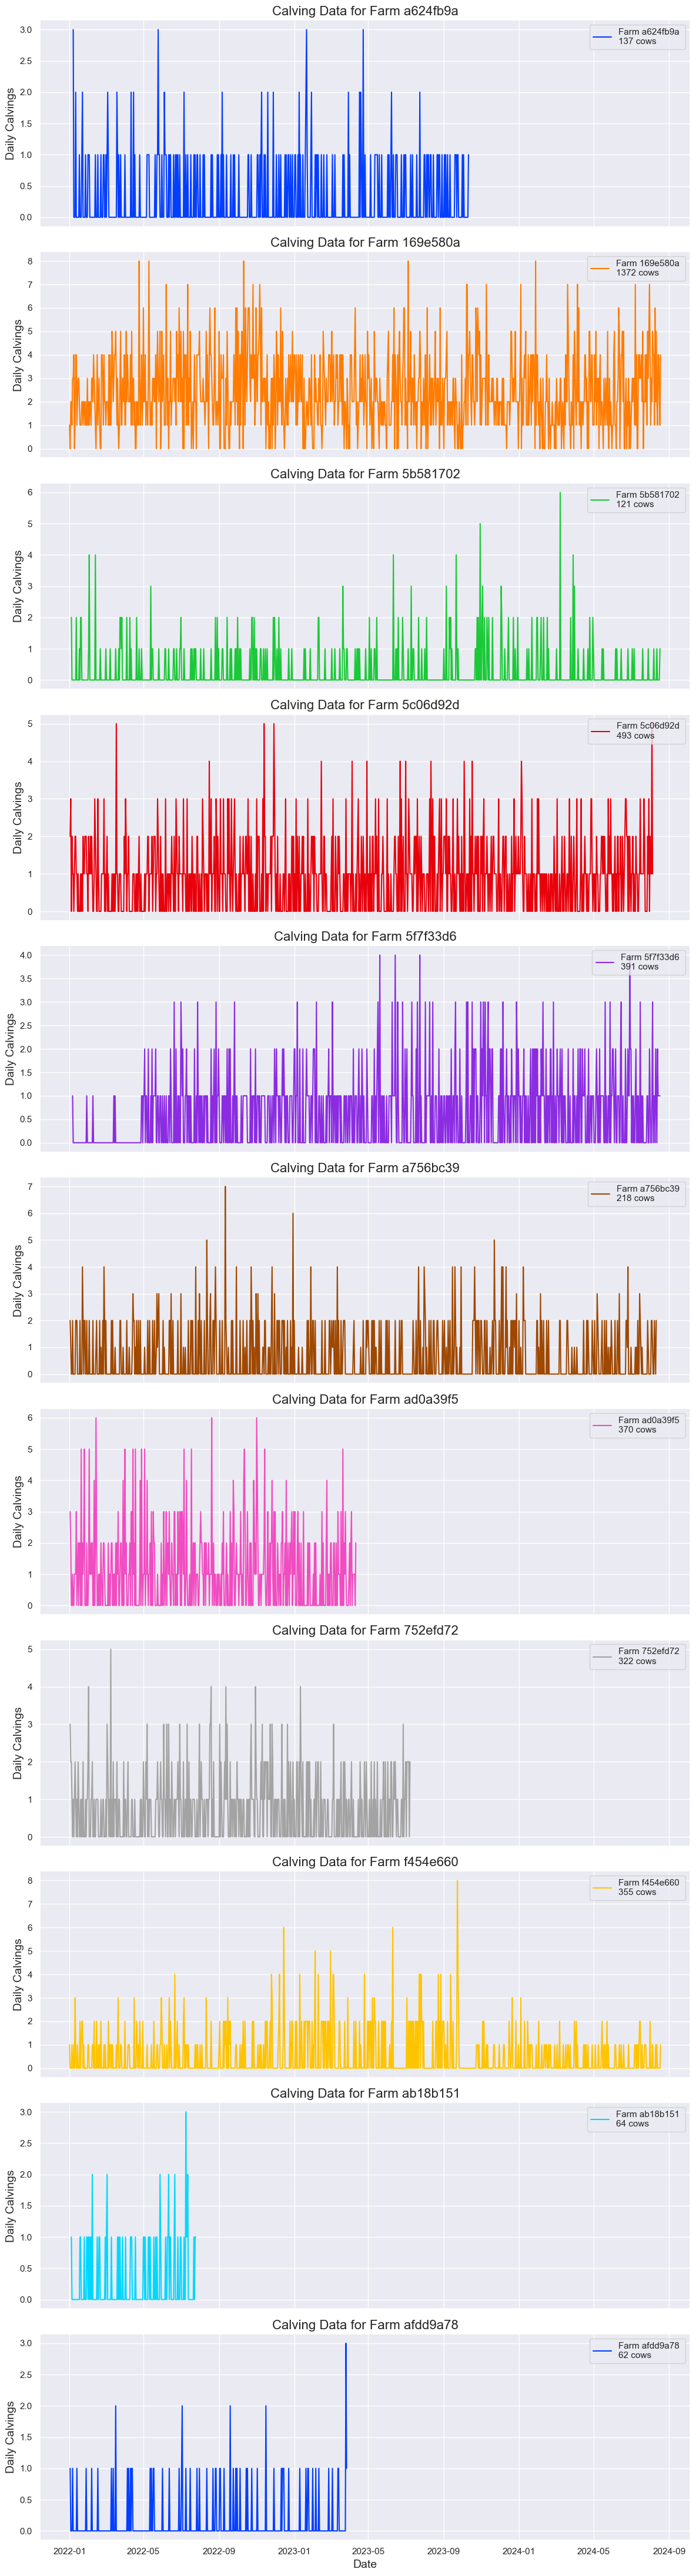

In [5]:
# List of farms
list_of_farms = list(data["FarmName_Pseudo"].unique())
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = data[data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_calvings = selected_farm.groupby('CalvingDate').size()
    
    # Check if daily_calvings has valid dates
    if not daily_calvings.empty and pd.notna(daily_calvings.index.min()) and pd.notna(daily_calvings.index.max()):
        color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
        farm_color_mapping[farm] = color
        all_dates = pd.date_range(start=daily_calvings.index.min(), end=daily_calvings.index.max(), freq='D')
        daily_calvings = daily_calvings.reindex(all_dates, fill_value=0)
        
        ax.plot(daily_calvings.index, daily_calvings.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
        ax.set_title(f'Calving Data for Farm {farm}', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.legend(loc='upper right')
        ax.grid(True)
    else:
        ax.set_title(f'Calving Data for Farm {farm} (No valid data)', fontsize=16)
        ax.set_ylabel('Daily Calvings', fontsize=14)
        ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

## Which Farms To Choose 

Some columns are to important to not have, thus, when we now have filtered all the data here, after the exploration, we can see that these following farms have sufficient data: 

**a624fb9a**

**169e580a**

**5b581702**

**a756bc39**

**5c06d92d**

**f454e660**

In [6]:
selected_farms = ['a624fb9a', '169e580a', '5b581702', 'a756bc39', '5c06d92d', 'f454e660']
data = data[data['FarmName_Pseudo'].isin(selected_farms)]

# Save the cleaned data to a new CSV file called 'CleanedCalvingData.csv' in same folder
data.to_csv('../Data/MergedData/CleanedCalvingData.csv', index=False)

### Variables Explanation for `CleanedCalvingData.csv`

1. **SE_Number**:
   - Description: A unique identifier for each cow.
   - Datatype: `str`
   - Example: `SE-064c0cec-1189`

2. **FarmName_Pseudo**:
   - Description: A pseudonym for the farm where the data was collected.
   - Datatype: `str`
   - Example: `a624fb9a`

3. **CalvingDate**:
   - Description: The date when the cow calved.
   - Datatype: `str` (converted to `datetime`)
   - Format: `YYYY-MM-DD`
   - Example: `2022-05-25`

4. **CalvingSireBullID**:
   - Description: The identifier for the bull used during the calving.
   - Datatype: `str`
   - Example: `9-4733 Fillman`

5. **CalvingEase**:
   - Description: A categorical variable indicating the ease of calving.
   - Datatype: `str`
   - Example: `11` (Easy, without assistance)

6. **BreedName**:
   - Description: The breed of the cow.
   - Datatype: `str`
   - Example: `02 SLB`

7. **BirthDate**:
   - Description: The birth date of the cow.
   - Datatype: `str` (converted to `datetime`)
   - Format: `YYYY-MM-DD`
   - Example: `2013-07-12`

8. **Mother**:
   - Description: The identifier for the mother of the cow.
   - Datatype: `str`
   - Example: `SE-a624fb9a-0966`

9. **Father**:
   - Description: The identifier for the father of the cow.
   - Datatype: `str`
   - Example: `3-9071 Apollo`

10. **YearSeason**:
    - Description: The seasonal period based on the year and the month range.
    - Datatype: `str`
    - Example: `2022-2`
    - YearSeason parameters:
      - 1: Dec-Feb
      - 2: Mar-May
      - 3: Jun-Aug
      - 4: Sep-Nov

11. **MeanTemperature**:
    - Description: The mean temperature recorded on the calving day.
    - Datatype: `float`
    - Example: `12.987499999999999`

12. **MeanRelativeHumidity**:
    - Description: The mean relative humidity recorded on the calving day.
    - Datatype: `float`
    - Example: `0.7555416666666667`

13. **MeanTHI_adj**:
    - Description: The mean adjusted Temperature-Humidity Index for the calving day.
    - Datatype: `float`
    - Example: `55.21842`

14. **HW**:
    - Description: A binary variable indicating the presence of a heatwave on the calving day (0: no heatwave, 1: heatwave).
    - Datatype: `Int64`
    - Example: `0`

15. **cum_HW**:
    - Description: Cumulative number of heatwave days up to the calving day.
    - Datatype: `Int64`
    - Example: `0`

16. **MaxTemp15Threshold**:
    - Description: A binary variable indicating if the temperature exceeded 15°C on the calving day (0: no, 1: yes).
    - Datatype: `Int64`
    - Example: `1`